In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 워닝 무시
import warnings
warnings.filterwarnings('ignore')

In [4]:
df_ad = pd.read_csv("data/advertising.csv")

print(df_ad.shape)
df_ad.head(3)

(1000, 10)


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,NaN,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0


# 1. 데이터 전처리

### 결측치 탐지 및 처리

In [5]:
# 컬럼별 결측치 탐지
df_ad.isnull().sum()

Daily Time Spent on Site     0
Age                         84
Area Income                  0
Daily Internet Usage         0
Ad Topic Line                0
City                         0
Male                         0
Country                      0
Timestamp                    0
Clicked on Ad                0
dtype: int64

In [6]:
df_ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       916 non-null    float64
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.3+ KB


In [7]:
# 결측치 비율 확인
df_ad.isna().sum() / len(df_ad)

Daily Time Spent on Site    0.000
Age                         0.084
Area Income                 0.000
Daily Internet Usage        0.000
Ad Topic Line               0.000
City                        0.000
Male                        0.000
Country                     0.000
Timestamp                   0.000
Clicked on Ad               0.000
dtype: float64

In [6]:
# # (참고) 결측치 행 삭제
# df_ad.dropna()

### 평균으로 age 결측치 채워넣기

In [10]:
# df_ad['Age']

In [8]:
# 평균 나이 구하기
age_avg = round(df_ad['Age'].mean(), 0)
age_avg

np.float64(36.0)

In [17]:
# age 결측치 평균 나이로 채우기
df_ad['Age'] = df_ad['Age'].fillna(age_avg)
df_ad

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,36.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2/11/2016 21:49,1
996,51.30,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,4/22/2016 2:07,1
997,51.63,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2/1/2016 17:24,1
998,55.55,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,3/24/2016 2:35,0


# 2. 탐색적 데이터 분석

In [31]:
#value_counts()👉 각 값이 몇 번 나왔는지 세는 함수
df_ad['Clicked on Ad'].value_counts()

Clicked on Ad
0    500
1    500
Name: count, dtype: int64

### 상자그림

In [24]:
# 수치형 변수 리스트화
#select_dtypes() = 데이터 타입 기준으로 컬럼 고르기
#include=['float64'] = float64 타입 컬럼만 포함
#3️⃣ .columns 👉 선택된 컬럼들의 이름만 추출 4️⃣ .tolist()👉 컬럼 이름을 리스트 형태로 변환
num_list = df_ad.select_dtypes(include=['float64']).columns.tolist()
num_list

['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

In [26]:
# enumerate : 인덱스 번호를 포함해서 반복대상 반복
# num_list 안에 있는 값을 하나씩 꺼내면서 반복
# 두 개의 변수에 저장함:
# i → 번호
# col → 컬럼 이름
#2️⃣ enumerate(num_list, 1)👉 리스트에 번호를 붙여주는 함수

for i, col in enumerate(num_list, 1):
    print(i, col)

1 Daily Time Spent on Site
2 Age
3 Area Income
4 Daily Internet Usage


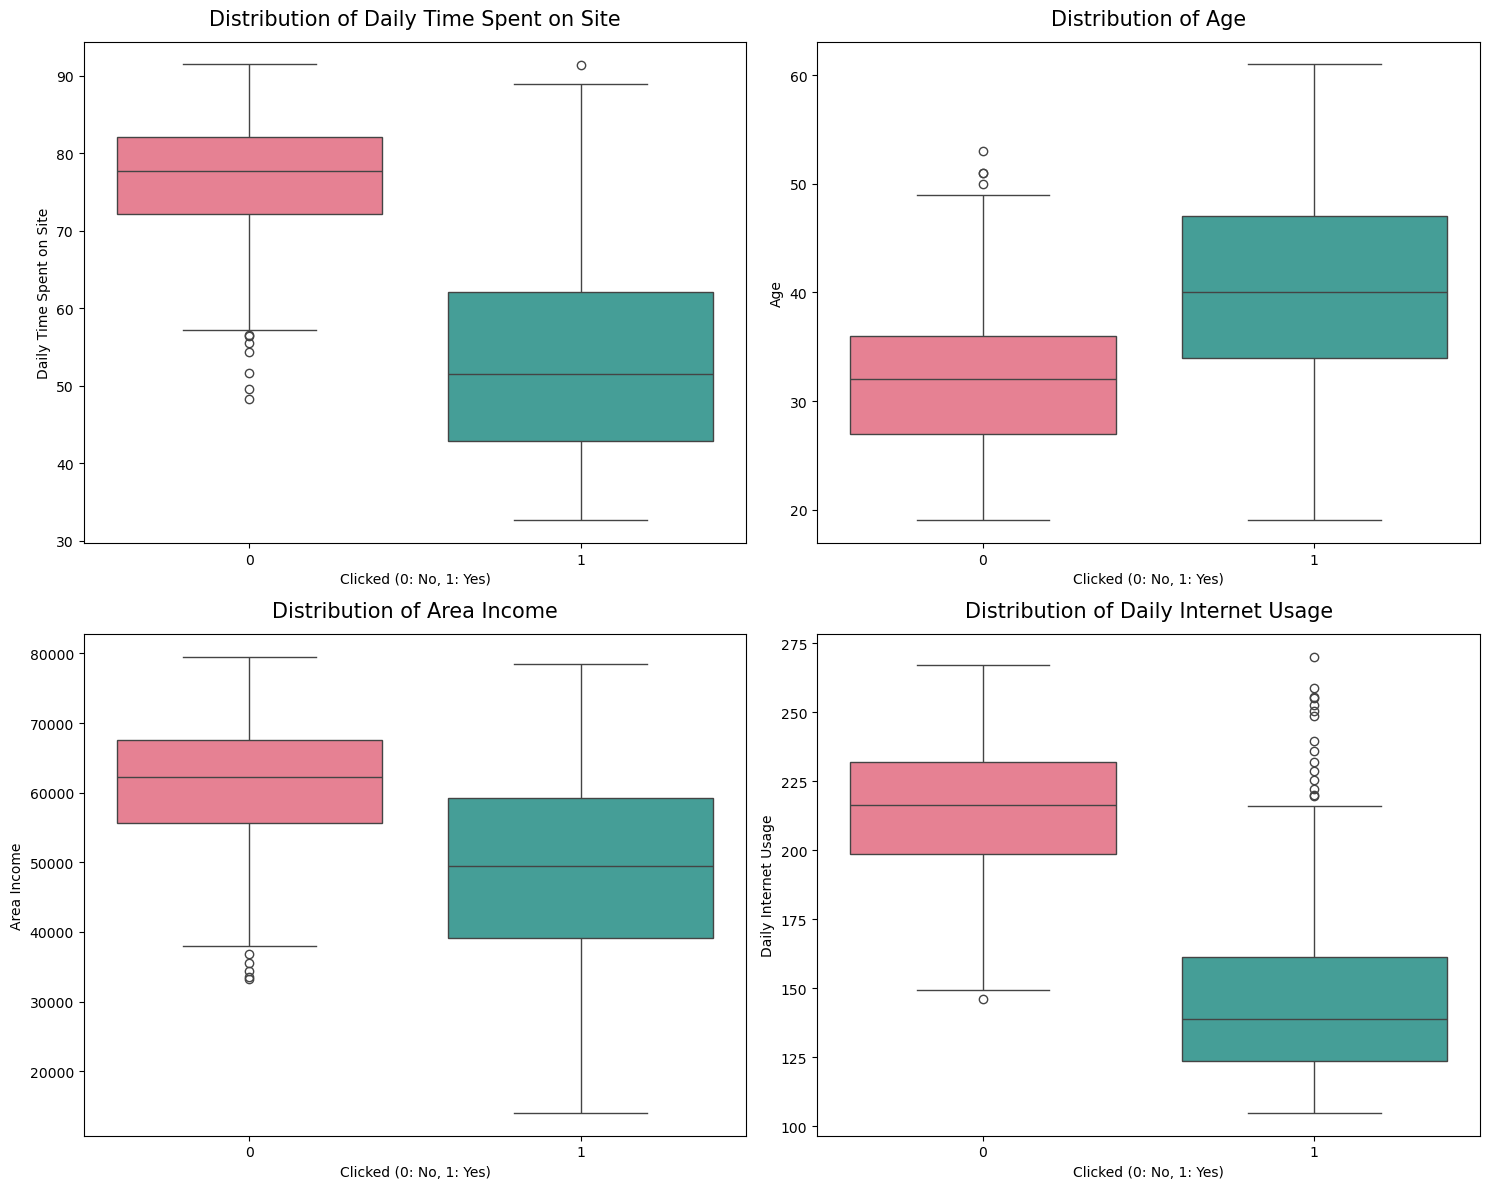

In [30]:
# 수치형 변수들 박스플롯(클력 여부로 구분)
plt.figure(figsize=(15, 12))

for i, col in enumerate(num_list, 1):
    plt.subplot(2, 2, i)   # 행 2열 구조에서 i번째 위치에 그래프 배치
    # x축을 클릭 여부로 설정하여 그룹별 비교
    sns.boxplot(x='Clicked on Ad', y=col, data=df_ad, palette='husl')  #박스플랏 ,x ,y지정 불러올데이터,색상스타일
    plt.title(f'Distribution of {col}', fontsize=15, pad=12)  # 타이틀 글자   /크기
    plt.xlabel('Clicked (0: No, 1: Yes)')  #👉 x축: 클릭 여부 설명
    plt.ylabel(col)    #👉 y축: 현재 컬럼 이름

plt.tight_layout()  # 👉 그래프들이 겹치지 않게 자동 정렬
plt.show()

### 산점도

In [38]:
#데이터프레임의 컬럼(열) 이름들을 확인하는 코드
df_ad.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

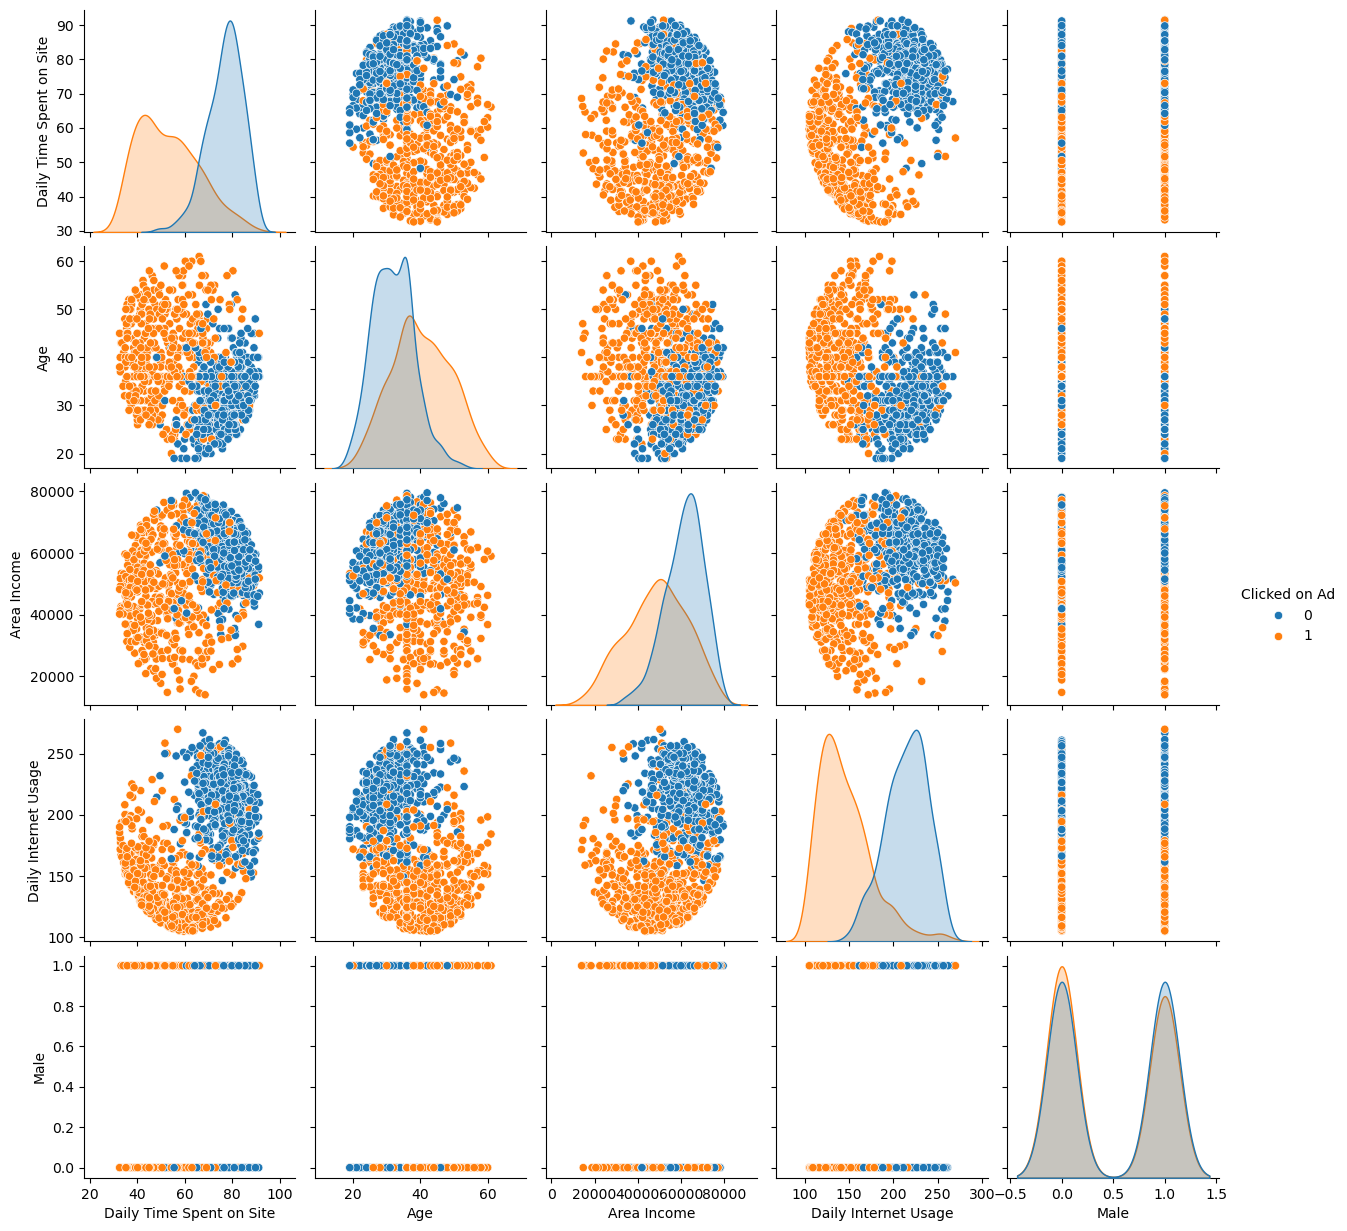

In [42]:
#sns.pairplot()👉 모든 변수들 간의 관계를 한 번에 그려주는 함수
#hue='Clicked on Ad' 👉 색깔을 클릭 여부 기준으로 나누겠다는 뜻
sns.pairplot(df_ad, hue='Clicked on Ad');

In [43]:
# 수치형 변수들은 클릭 여부에 유의한 영향을 미치는 변수들로 보인다.

# 3. 로지스틱 회귀 모델링

In [9]:
#📌 로지스틱 회귀 모델이란?  👉 두 가지 중 하나를 예측하는 분류 모델

# 1️⃣ 일반 회귀(Linear Regression)

# 👉 숫자를 예측
# 예: 집값 3억 2천만 원

# 2️⃣ 로지스틱 회귀(Logistic Regression)

# 👉 확률을 예측
# 예: 클릭할 확률 0.82 (82%)

# 그리고 그 확률이:

SyntaxError: invalid character '️' (U+FE0F) (643648625.py, line 3)

In [10]:
# Clicked on Ad
# 0 - No click, 1 - Clicked

In [44]:
df_ad.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [46]:
# train_test data 분리
#👉 데이터를 훈련용 / 테스트용으로 나누는 함수 가져오는 것
#from👉 ~로부터 가져온다
#Scikit-learn 라이브러리(머신러닝 전용 파이썬 라이브러리)
#.model_selection 👉 sklearn 안에 있는 모듈(기능 묶음)
#import👉 가져와서 사용하겠다
#train_test_split 데이터를훈련용(Train)테스트용(Test)으로 나누는 함수 (고정된) 함수 이름이야.
from sklearn.model_selection import train_test_split

X = df_ad[ ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male'] ]  #📌 X = 문제를 푸는 데 쓰는 정보들
y = df_ad['Clicked on Ad']  #📌 y = 예측 목표(Target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
#test_size=0.2👉 전체 데이터 중 20%를 테스트용으로 사용80% → 훈련 데이터20% → 테스트 데이터
#andom_state=100 👉 데이터를 섞는 기준값 (난수 고정)



# 데이터가 잘 분리되었는지 확인
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
# #🎯 해석
# 👉 훈련용 데이터는 800개고
# 👉 각 데이터는 5개의 특징을 가지고 있다
#print(y_test.shape) 👉 테스트용 정답 데이터가 200개 있다


# #🎯 왜 (200,) 이렇게 나오냐?
# X_test → 여러 컬럼 → 2차원 → (200, 5)
# y_test → 한 컬럼 → 1차원 → (200,)
# 쉽게 말하면:
# X는 표 형태
# y는 한 줄짜리 값 모음

(800, 5)
(200, 5)
(800,)
(200,)


In [49]:
# 모델 불러오기
#🔹 sklearn 👉 머신러닝 라이브러리 (Scikit-learn)
#🔹 LogisticRegression👉 로지스틱 회귀 모델 클래스

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR  # 빈 모델 상태

LogisticRegression()

In [50]:
# 로지스틱 모델 적합
#.fit()👉 학습시키는 함수
# X_train👉 입력 데이터 (문제)
# y_train👉 정답 데이터 (정답지)
LR.fit(X_train, y_train)

LogisticRegression()

In [51]:
# coefficient 확인 👉 각 변수의 가중치(계수, coefficient)를 보여주는 것 👉 어떤 변수가 클릭 확률에 얼마나 영향을 주는지 숫자로 보여줌
LR.coef_

array([[-9.45163154e-02,  2.66629278e-01, -6.58583960e-05,
        -1.35196412e-02,  5.08958135e-01]])

# 4. 예측 및 평가

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [53]:
# 예측 수행
#🔹 LR학습이 끝난 로지스틱 회귀 모델 🔹 .predict()👉 예측값(0 또는 1)을 반환🔹 X_test테스트용 입력 데이터
y_pred = LR.predict(X_test)

# 성능 지표 출력
#🔹 accuracy_score👉 실제값과 예측값을 비교해서👉 맞춘 비율을 계산하는 함수
print("1. Accuracy (정확도):", accuracy_score(y_test, y_pred))

1. Accuracy (정확도): 0.91


In [54]:
#1️⃣ Confusion Matrix(혼동 행렬)이란? 👉 실제값 vs 예측값을 표로 정리한 것  2x2 표로 나와 👇
print("\n2. Confusion Matrix (혼동 행렬):")  
print(confusion_matrix(y_test, y_pred))
'''
해석:	예측 0	예측 1
실제 0	90	10
실제 1	15	85

TN = 92
FP = 08
FN = 10
TP = 90
🎯 광고 관점에서 중요 포인트
🔴 FP 많으면?
👉 광고 안 클릭할 사람에게 광고비 낭비
🔴 FN 많으면?
👉 클릭할 고객을 놓침 → 매출 손실
상황에 따라 중요도가 달라짐.
'''


2. Confusion Matrix (혼동 행렬):
[[92  8]
 [10 90]]


In [55]:
#📌 classification_report란?👉 Precision, Recall, F1-score를👉 한 번에 정리해서 보여주는 리포트

print("\n3. Classification Report (상세 리포트):")
print(classification_report(y_test, y_pred))


3. Classification Report (상세 리포트):
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       100
           1       0.92      0.90      0.91       100

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200



# 5. 중요 변수 파악

In [57]:
# 1. 모델에서 계수(Coefficients) 추출
# LR.coef_[0]에는 각 변수에 매칭되는 가중치 값이 들어있습니다.
coef_df = pd.DataFrame({'Feature': X.columns,'Coefficient': LR.coef_[0]})

# 2. 계수 값을 기준으로 정렬
#👉 계수 큰 순서대로 정렬ascending=False → 큰 값부터 (내림차순)
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
coef_df
'''
📊 해석 방법
✔ 양수 (+)
→ 값이 커질수록 클릭 확률 증가
✔ 음수 (-)
→ 값이 커질수록 클릭 확률 감소
✔ 절댓값이 클수록 영향력 큼
'''

,Feature,Coefficient
4,Male,0.508958
1,Age,0.266629
2,Area Income,-0.000066
3,Daily Internet Usage,-0.013520
0,Daily Time Spent on Site,-0.094516


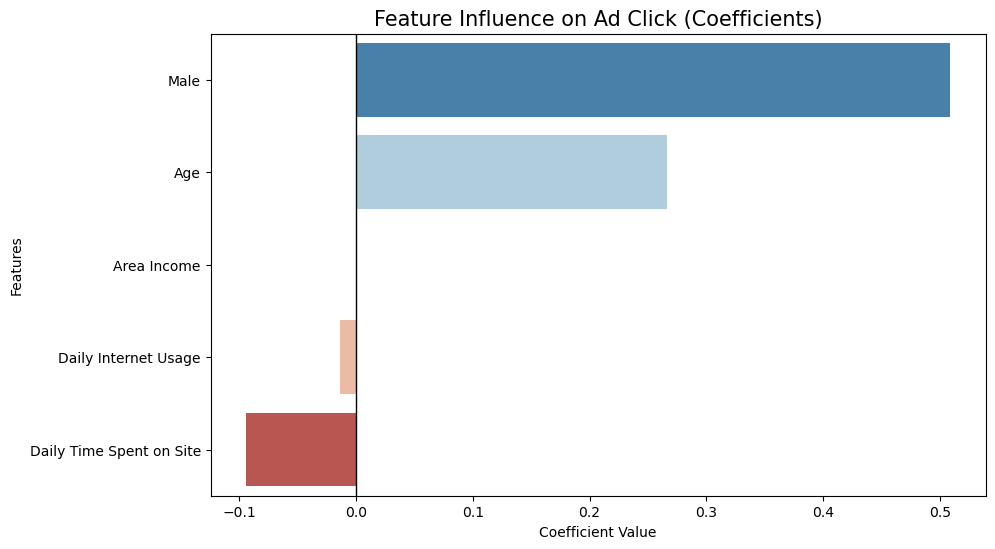

                    Feature  Coefficient
4                      Male     0.508958
1                       Age     0.266629
2               Area Income    -0.000066
3      Daily Internet Usage    -0.013520
0  Daily Time Spent on Site    -0.094516


In [ ]:
# 3. 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='RdBu_r')
plt.axvline(0, color='black', lw=1) # 0을 기준으로 양수와 음수를 가르는 선
plt.title('Feature Influence on Ad Click (Coefficients)', fontsize=15)
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()

# 수치로 확인
print(coef_df)

In [ ]:
"""
<변수별 중요도 파악>

중요도 순위	변수명	계수(Coef)	해석 (클릭 확률과의 관계)
1위	Male	+0.5089	가장 강력한 변수. 남성일수록 클릭 확률이 크게 증가합니다.
2위	Age	    +0.2666	나이가 많을수록 클릭 확률이 높아집니다.

3위	Daily Time Spent on Site	-0.0945	사이트 체류 시간이 짧을수록 클릭 확률이 높아집니다.
4위	Daily Internet Usage	    -0.0135	인터넷 총 사용량이 적을수록 클릭 확률이 높아집니다.
5위	Area Income	                -0.000066	수치가 너무 작아 클릭 여부에 거의 영향을 주지 않습니다.
"""